In [2]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 4.4 MB/s eta 0:00:00


In [3]:
import boto3

aws_access_key_id = ''
aws_secret_access_key = ''

# **Amazon Comprehend**

Amazon Comprehend is an Amazon Web Services service for gaining insight into the content of documents. Use these actions to determine the topics contained in your documents, the topics they discuss, the predominant sentiment expressed in them, the predominant language used, and more.

- Modelo built-in:
View real-time insights based on AWS built-in models.

- Custom:
View real-time insights based on custom models from an endpoint you've created.

## **Amazon Comprehend Real time**

In [5]:
client = boto3.client(
    'comprehend',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    region_name = 'us-east-1')

In [ ]:

text = """Itaú Unibanco, comumente chamado de Itaú, é o maior banco privado do
        Brasil e maior conglomerado financeiro do hemisfério sul,[1][6] com sede
        na cidade de São Paulo, no estado homônimo. O banco foi criado em 4 de
        novembro de 2008 a partir da fusão entre o Banco Itaú e o Unibanco, duas
        das maiores instituições financeiras do país, resultando no maior
        conglomerado financeiro do hemisfério sul e num dos 20 maiores do mundo
        em valor de mercado."""

response = client.detect_dominant_language(
    Text=text
)
idioma = response['Languages'][0]['LanguageCode']
print(f"idioma: {idioma}")


response_detect_sentiment = client.detect_sentiment(Text=text, LanguageCode=idioma)
print(f"analise de sentimento: {json.dumps(response_detect_sentiment['SentimentScore'])}")

#essa opcao pode ser utilizada com endpoint proprio
#caso o modelo proprio tenha sido treinado para ler arquivos pdf ou word, pode ser
#passado o parametro Bytes ao inves de text
response_detect_entities_from_text = client.detect_entities(Text=text, LanguageCode=idioma)
print(f"entidades: {json.dumps(response_detect_entities_from_text['Entities'])}")


response_detect_key_phrases = client.detect_key_phrases(
    Text=text,
    LanguageCode=idioma
)
print(f"frases chaves: {json.dumps(response_detect_key_phrases['KeyPhrases'])}")

#disponive apenas para en e es
text_en = "James Oliver resident on Ohio was an idiot"
response_detect_pii_entities = client.detect_pii_entities(
    Text=text_en,
    LanguageCode='en'
)
print(f"entidades PII: {json.dumps(response_detect_pii_entities['Entities'])}")


response_detect_syntax = client.detect_syntax(
    Text=text,
    LanguageCode='pt'
)
print(f"sintaxe: {json.dumps(response_detect_syntax['SyntaxTokens'])}")

#apenas ingles
response_detect_targeted_sentiment = client.detect_targeted_sentiment(
    Text=text_en,
    LanguageCode='en'
)
print(f"sentimento: {json.dumps(response_detect_targeted_sentiment)}")

#apenas ingles
response_detect_toxic_content = client.detect_toxic_content(
    TextSegments=[
        {
            'Text': text_en
        },
    ],
    LanguageCode='en'
)
print(f"toxic content: {json.dumps(response_detect_toxic_content['ResultList'])}")

idioma: pt
analise de sentimento: {"Positive": 0.00038000772474333644, "Negative": 3.576932067517191e-05, "Neutral": 0.9995809197425842, "Mixed": 3.3433118460379774e-06}
entidades: [{"Score": 0.9883092641830444, "Type": "ORGANIZATION", "Text": "Ita\u00fa Unibanco", "BeginOffset": 0, "EndOffset": 13}, {"Score": 0.9849556088447571, "Type": "ORGANIZATION", "Text": "Ita\u00fa", "BeginOffset": 36, "EndOffset": 40}, {"Score": 0.969366192817688, "Type": "LOCATION", "Text": "Brasil", "BeginOffset": 78, "EndOffset": 84}, {"Score": 0.5506264567375183, "Type": "QUANTITY", "Text": "financeiro", "BeginOffset": 106, "EndOffset": 116}, {"Score": 0.9301655292510986, "Type": "LOCATION", "Text": "hemisf\u00e9rio sul", "BeginOffset": 120, "EndOffset": 134}, {"Score": 0.9694257974624634, "Type": "OTHER", "Text": "1", "BeginOffset": 136, "EndOffset": 137}, {"Score": 0.948638916015625, "Type": "OTHER", "Text": "6", "BeginOffset": 139, "EndOffset": 140}, {"Score": 0.9901174306869507, "Type": "LOCATION", "Tex

## **Amazon Comprehend Analysis Job**

In [ ]:
import time

client_s3 = boto3.client('s3',
                      aws_access_key_id=aws_access_key_id,
                      aws_secret_access_key=aws_secret_access_key,
                      region_name = 'us-east-1')

response = client_s3.put_object(Body=text.encode('utf-8'),
                  Bucket='techexperts-examples-tiago',
                  Key='comprehend/text.txt'
                  )

response = client.start_entities_detection_job(
    InputDataConfig={
        'S3Uri': 's3://techexperts-examples-tiago/comprehend/',
        'InputFormat': 'ONE_DOC_PER_FILE'
    },
    OutputDataConfig={
        'S3Uri': 's3://techexperts-examples-tiago/comprehend_outputs/'
    },
    DataAccessRoleArn='arn:aws:iam::381492144968:role/service-role/AmazonComprehendServiceRole-AmazonComprehendServiceRole-',
    JobName='example2',
    LanguageCode='pt'
)

while response['JobStatus'] != 'COMPLETED':
    response = client.describe_entities_detection_job(
        JobId=response['JobId']
        )['EntitiesDetectionJobProperties']
    time.sleep(10)

print(response['OutputDataConfig']['S3Uri'])

{'ResponseMetadata': {'RequestId': 'QY3MRFRW315YHJ27',
  'HostId': 'bhugPCIw/eikzLnoXM9RHdrOSxuZS3hGFEOBH7a9RxDfd5gPaPLd2rGEPhcwakKXudHq45y+yOE=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'bhugPCIw/eikzLnoXM9RHdrOSxuZS3hGFEOBH7a9RxDfd5gPaPLd2rGEPhcwakKXudHq45y+yOE=',
   'x-amz-request-id': 'QY3MRFRW315YHJ27',
   'date': 'Wed, 11 Sep 2024 18:58:16 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"43e8bba3755ce5425fc71c6bc9ba3978"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"43e8bba3755ce5425fc71c6bc9ba3978"',
 'ServerSideEncryption': 'AES256'}

{"Entities": [{"BeginOffset": 0, "EndOffset": 13, "Score": 0.9883090923949291, "Text": "Ita\u00fa Unibanco", "Type": "ORGANIZATION"}, {"BeginOffset": 36, "EndOffset": 40, "Score": 0.9849555075894928, "Text": "Ita\u00fa", "Type": "ORGANIZATION"}, {"BeginOffset": 78, "EndOffset": 84, "Score": 0.9693662933780149, "Text": "Brasil", "Type": "LOCATION"}, {"BeginOffset": 106, "EndOffset": 116, "Score": 0.5506249114024349, "Text": "financeiro", "Type": "QUANTITY"}, {"BeginOffset": 120, "EndOffset": 134, "Score": 0.9301656569977025, "Text": "hemisf\u00e9rio sul", "Type": "LOCATION"}, {"BeginOffset": 136, "EndOffset": 137, "Score": 0.9694256664561407, "Text": "1", "Type": "OTHER"}, {"BeginOffset": 139, "EndOffset": 140, "Score": 0.9486392287040303, "Text": "6", "Type": "OTHER"}, {"BeginOffset": 172, "EndOffset": 181, "Score": 0.9901175666999477, "Text": "S\u00e3o Paulo", "Type": "LOCATION"}, {"BeginOffset": 225, "EndOffset": 254, "Score": 0.9991590830616746, "Text": "4 de\n        novembro de 2008", "Type": "DATE"}, {"BeginOffset": 281, "EndOffset": 291, "Score": 0.9982451757184437, "Text": "Banco Ita\u00fa", "Type": "ORGANIZATION"}, {"BeginOffset": 296, "EndOffset": 304, "Score": 0.9963272300188403, "Text": "Unibanco", "Type": "ORGANIZATION"}, {"BeginOffset": 306, "EndOffset": 355, "Score": 0.9624230377811643, "Text": "duas\n        das maiores institui\u00e7\u00f5es financeiras", "Type": "QUANTITY"}, {"BeginOffset": 420, "EndOffset": 434, "Score": 0.9576222519409225, "Text": "hemisf\u00e9rio sul", "Type": "LOCATION"}, {"BeginOffset": 437, "EndOffset": 464, "Score": 0.797057860336728, "Text": "num dos 20 maiores do mundo", "Type": "QUANTITY"}], "File": "text.txt"}


## **Amazon Comprehend - Treinar seu próprio modelo**

In [ ]:
import pandas as pd

df = pd.read_csv('imdb-reviews-pt-br.csv')
#drop col text_en
df = df.drop(columns=['text_en','id'])

#change order or of columns
df = df[['sentiment', 'text_pt']]

#save without header
df.to_csv('dataset.csv', index=False, header=False)

df.head()

,sentiment,text_pt
0,neg,"Mais uma vez, o Sr. Costner arrumou um filme p..."
1,neg,Este é um exemplo do motivo pelo qual a maiori...
2,neg,"Primeiro de tudo eu odeio esses raps imbecis, ..."
3,neg,Nem mesmo os Beatles puderam escrever músicas ...
4,neg,Filmes de fotos de latão não é uma palavra apr...


In [ ]:
client_s3 = boto3.client('s3',
                      aws_access_key_id=aws_access_key_id,
                      aws_secret_access_key=aws_secret_access_key,
                      region_name = 'us-east-1'
                      )

response = client_s3.upload_file('dataset.csv', 'techexperts-examples-tiago', 'comprehend_training/dataset.csv')


response = client.create_document_classifier(
                DocumentClassifierName='my-classifier-1',
                LanguageCode='pt',
                InputDataConfig={"S3Uri": "s3://techexperts-examples-tiago/comprehend_training/dataset.csv"},
                DataAccessRoleArn='arn:aws:iam::381492144968:role/service-role/AmazonComprehendServiceRole-AmazonComprehendServiceRole-',
                Mode='MULTI_CLASS',
            )
classifier_arn = response["DocumentClassifierArn"]
print(classifier_arn)


arn:aws:comprehend:us-east-1:381492144968:document-classifier/my-classifier-1


In [6]:
client.describe_document_classifier(
    DocumentClassifierArn='arn:aws:comprehend:us-east-1:381492144968:document-classifier/my-classifier-1'
)

{'DocumentClassifierProperties': {'DocumentClassifierArn': 'arn:aws:comprehend:us-east-1:381492144968:document-classifier/my-classifier-1',
  'LanguageCode': 'pt',
  'Status': 'TRAINED',
  'SubmitTime': datetime.datetime(2024, 9, 11, 19, 57, 44, 682000, tzinfo=tzlocal()),
  'EndTime': datetime.datetime(2024, 9, 12, 0, 30, 53, 59000, tzinfo=tzlocal()),
  'TrainingStartTime': datetime.datetime(2024, 9, 11, 20, 0, 54, 658000, tzinfo=tzlocal()),
  'TrainingEndTime': datetime.datetime(2024, 9, 12, 0, 28, 55, 24000, tzinfo=tzlocal()),
  'InputDataConfig': {'DataFormat': 'COMPREHEND_CSV',
   'S3Uri': 's3://techexperts-examples-tiago/comprehend_training/dataset.csv'},
  'OutputDataConfig': {},
  'ClassifierMetadata': {'NumberOfLabels': 2,
   'NumberOfTrainedDocuments': 44514,
   'NumberOfTestDocuments': 4945,
   'EvaluationMetrics': {'Accuracy': 0.9039,
    'Precision': 0.904,
    'Recall': 0.9039,
    'F1Score': 0.9039,
    'MicroPrecision': 0.9039,
    'MicroRecall': 0.9039,
    'MicroF1Scor

In [7]:
response = client.create_endpoint(
    EndpointName='teste-endpoint',
    ModelArn='arn:aws:comprehend:us-east-1:381492144968:document-classifier/my-classifier-1',
    DesiredInferenceUnits=1, #A single IU can analyze one hundred characters per second. IU is a measure of the endpoint's throughput. You can adjust the IU of an endpoint anytime.
    DataAccessRoleArn='arn:aws:iam::381492144968:role/service-role/AmazonComprehendServiceRole-AmazonComprehendServiceRole-',
)

In [19]:
client.describe_endpoint(
    EndpointArn='arn:aws:comprehend:us-east-1:381492144968:document-classifier-endpoint/teste-endpoint'
)

{'EndpointProperties': {'EndpointArn': 'arn:aws:comprehend:us-east-1:381492144968:document-classifier-endpoint/teste-endpoint',
  'Status': 'CREATING',
  'ModelArn': 'arn:aws:comprehend:us-east-1:381492144968:document-classifier/my-classifier-1',
  'DesiredModelArn': 'arn:aws:comprehend:us-east-1:381492144968:document-classifier/my-classifier-1',
  'DesiredInferenceUnits': 1,
  'CurrentInferenceUnits': 0,
  'CreationTime': datetime.datetime(2024, 9, 12, 17, 42, 10, 735000, tzinfo=tzlocal()),
  'LastModifiedTime': datetime.datetime(2024, 9, 12, 17, 42, 10, 735000, tzinfo=tzlocal()),
  'DataAccessRoleArn': 'arn:aws:iam::381492144968:role/service-role/AmazonComprehendServiceRole-AmazonComprehendServiceRole-',
  'DesiredDataAccessRoleArn': 'arn:aws:iam::381492144968:role/service-role/AmazonComprehendServiceRole-AmazonComprehendServiceRole-'},
 'ResponseMetadata': {'RequestId': '05e931d4-efad-4234-9bf7-f82895da9aea',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '05e931d4-e

In [24]:
negativo = client.classify_document(
    Text='Voce nao é facil',
    EndpointArn='arn:aws:comprehend:us-east-1:381492144968:document-classifier-endpoint/teste-endpoint'
)

positivo = client.classify_document(
    Text='Que vida facil mano',
    EndpointArn='arn:aws:comprehend:us-east-1:381492144968:document-classifier-endpoint/teste-endpoint'
)

print(negativo)
print(positivo)

{'Classes': [{'Name': 'neg', 'Score': 1.0}, {'Name': 'pos', 'Score': 1.0002711860579439e-05}], 'ResponseMetadata': {'RequestId': '4eded36a-3016-4c28-9fd7-acea8ad6ad1c', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '4eded36a-3016-4c28-9fd7-acea8ad6ad1c', 'content-type': 'application/x-amz-json-1.1', 'content-length': '85', 'date': 'Thu, 12 Sep 2024 17:52:47 GMT'}, 'RetryAttempts': 0}}
{'Classes': [{'Name': 'pos', 'Score': 0.8462290167808533}, {'Name': 'neg', 'Score': 0.1537909358739853}], 'ResponseMetadata': {'RequestId': '6543acd9-714f-4565-b045-9ed39adf1aa9', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '6543acd9-714f-4565-b045-9ed39adf1aa9', 'content-type': 'application/x-amz-json-1.1', 'content-length': '97', 'date': 'Thu, 12 Sep 2024 17:52:47 GMT'}, 'RetryAttempts': 0}}


In [25]:
client.delete_endpoint(
    EndpointArn='arn:aws:comprehend:us-east-1:381492144968:document-classifier-endpoint/teste-endpoint'
)

{'ResponseMetadata': {'RequestId': '2a3ecae4-2f8f-4a56-81d3-48caeedf2d9c',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '2a3ecae4-2f8f-4a56-81d3-48caeedf2d9c',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '2',
   'date': 'Thu, 12 Sep 2024 17:53:26 GMT'},
  'RetryAttempts': 0}}

In [31]:
client.delete_document_classifier(
    DocumentClassifierArn='arn:aws:comprehend:us-east-1:381492144968:document-classifier/my-classifier-1'
)

{'ResponseMetadata': {'RequestId': '1ab7dcdf-3eb9-496f-8477-70543a053afa',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '1ab7dcdf-3eb9-496f-8477-70543a053afa',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '2',
   'date': 'Thu, 12 Sep 2024 17:59:31 GMT'},
  'RetryAttempts': 0}}

# **Amazon Translate**

In [33]:
import boto3

client_t = boto3.client('translate',
                      aws_access_key_id=aws_access_key_id,
                      aws_secret_access_key=aws_secret_access_key,
                      region_name = 'us-east-1')


## **Amazon Translate Real Time**

In [ ]:
text = 'Que vida dificil mano'

response_translate_text = client_t.translate_text(
    Text=text,
    SourceLanguageCode='pt',
    TargetLanguageCode='en'
)

print(f"translate: {response_translate_text['TranslatedText']}")


translate: What a difficult life bro


## **Amazon Translate Batch**

In [ ]:
import time
response = client_t.start_text_translation_job(
    JobName='translate_itau',
    InputDataConfig={
        'S3Uri': 's3://techexperts-examples-tiago/comprehend/',
        'ContentType': 'text/plain'
    },
    OutputDataConfig={
        'S3Uri': 's3://techexperts-examples-tiago/translate/',
    },
    DataAccessRoleArn='arn:aws:iam::381492144968:role/service-role/AmazonComprehendServiceRole-AmazonComprehendServiceRole-',
    SourceLanguageCode='pt',
    TargetLanguageCodes=[
        'en', 'fr'
    ],
    Settings={
        'Formality': 'INFORMAL',
        'Profanity': 'MASK',
        'Brevity': 'ON'
    }
)

while response['JobId'] != 'COMPLETED':
  response = client_t.describe_text_translation_job(
      JobId=response['JobId']
  )['TextTranslationJobProperties']
  time.sleep(10)

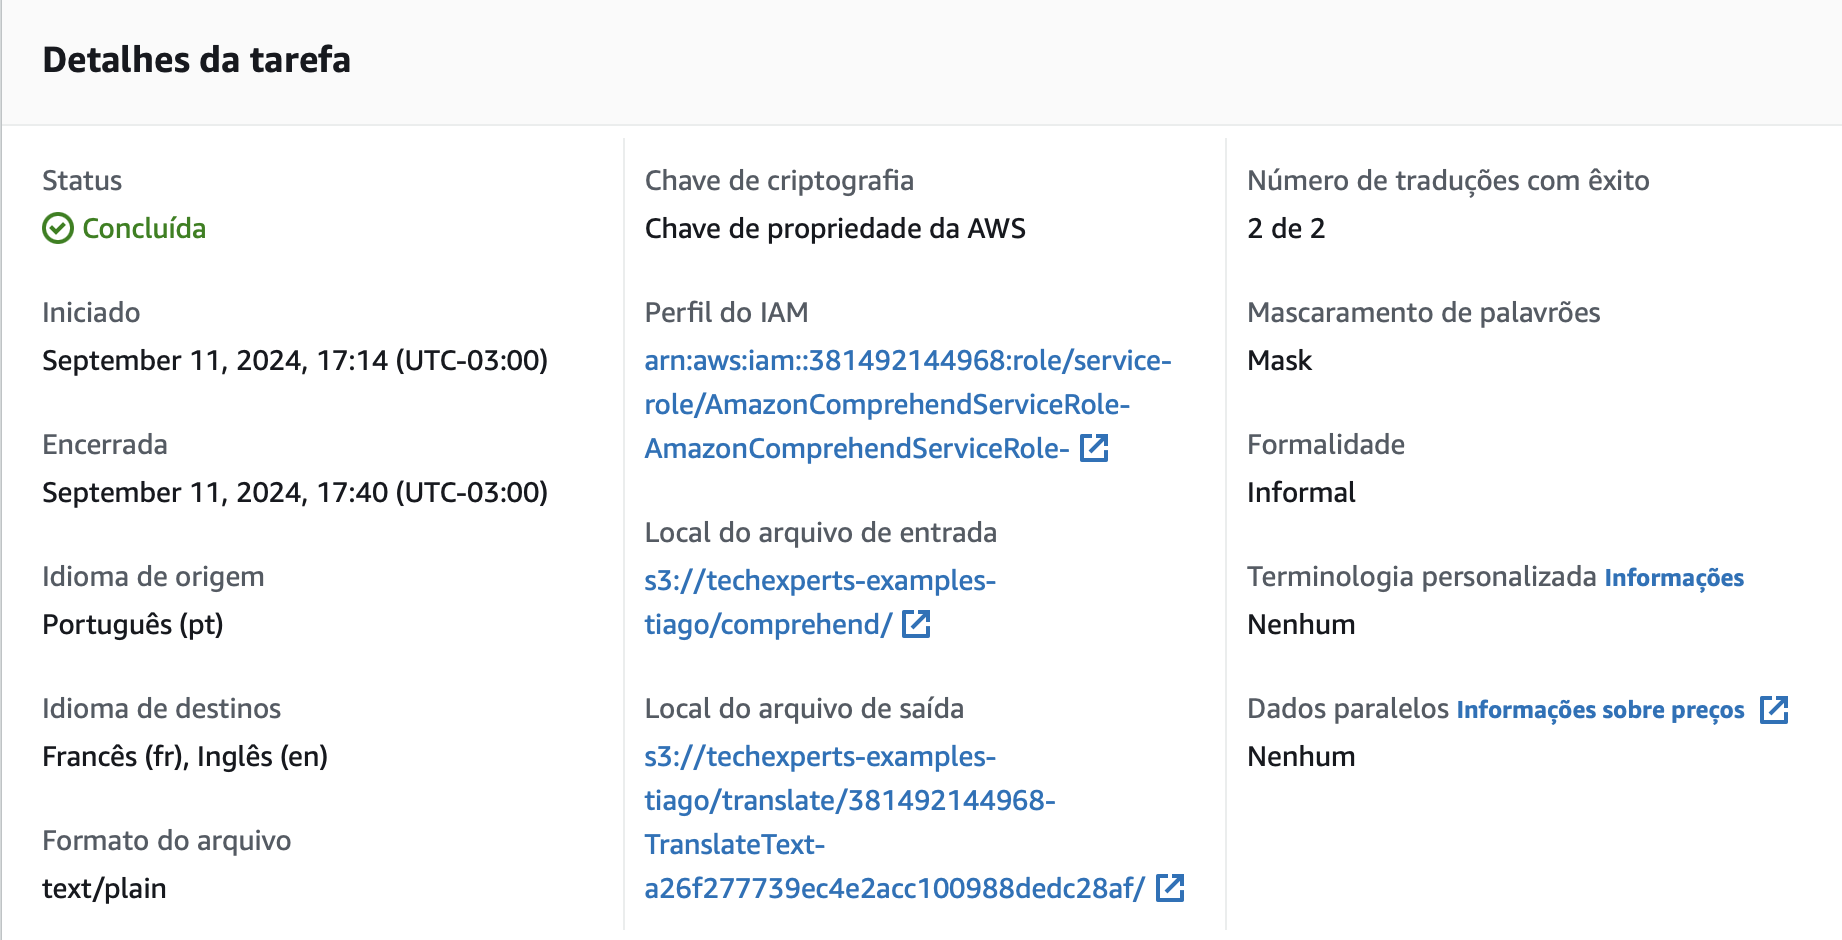

In [ ]:
response

{'JobId': '9ae3976d77e7e3f54df8b39a526885e2',
 'JobName': 'translate_itau',
 'JobStatus': 'IN_PROGRESS',
 'JobDetails': {'TranslatedDocumentsCount': 0,
  'DocumentsWithErrorsCount': 0,
  'InputDocumentsCount': 1},
 'SourceLanguageCode': 'pt',
 'TargetLanguageCodes': ['en', 'fr'],
 'SubmittedTime': datetime.datetime(2024, 9, 11, 20, 6, 39, 175000, tzinfo=tzlocal()),
 'InputDataConfig': {'S3Uri': 's3://techexperts-examples-tiago/comprehend/',
  'ContentType': 'text/plain'},
 'OutputDataConfig': {'S3Uri': 's3://techexperts-examples-tiago/translate/381492144968-TranslateText-9ae3976d77e7e3f54df8b39a526885e2/'},
 'DataAccessRoleArn': 'arn:aws:iam::381492144968:role/service-role/AmazonComprehendServiceRole-AmazonComprehendServiceRole-',
 'Settings': {'Formality': 'INFORMAL', 'Profanity': 'MASK'}}

# **Amazon Polly**

In [4]:
client_polly = boto3.client(
    'polly',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    region_name = 'us-east-1')

In [9]:
response = client_polly.synthesize_speech(
    Engine='standard',
    LanguageCode='pt-BR',
    OutputFormat='mp3',
    SampleRate='8000',
    Text='Exemplo de uso do amazon polly com texto',
    TextType='text',
    VoiceId='Camila'
)

file = open('exemple_1.mp3', 'wb')
file.write(response['AudioStream'].read())
file.close()

In [11]:
ssml_text = """
<speak>
     Exemplo de uso do polly com
     <lang xml:lang="en-US">ssml</lang>
     <break time="3s"/> legal.
</speak>
"""

response = client_polly.synthesize_speech(
    Engine='standard',
    LanguageCode='pt-BR',
    OutputFormat='mp3',
    SampleRate='8000',
    Text=ssml_text,
    TextType='ssml',
    VoiceId='Camila'
)

file = open('exemple_2.mp3', 'wb')
file.write(response['AudioStream'].read())
file.close()

Ver sobre lexicon:
https://docs.aws.amazon.com/polly/latest/dg/lexicons-applying.html